# Data Science and Visualization (RUC F2023)

## Lecture 8: Clustering II

 # DBSCAN
 
 We show some examples of DBSCAN.
 

## 1. An example with make_blobs()

We use this example to understand the effect of DBSCAN's parameters, i.e., eps and min_samples.

In [3]:
import mglearn
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

### Let's make 12 samples at random:

Function **make_blobs()** generates some random samples according to Guassian distributions. By default, it generates three clusters, and the points in each cluster follows a distinct Guassian distribution. 

It returns X, y:
- X is the data points.
- y is an array where each element indidates the corresponding Guassian distribution

More details are available at https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html. 

In [36]:
X, y = make_blobs(random_state=0, n_samples=12)

In [24]:
X, y

(array([[ 3.54934659,  0.6925054 ],
        [ 1.9263585 ,  4.15243012],
        [ 0.0058752 ,  4.38724103],
        [ 1.12031365,  5.75806083],
        [ 1.7373078 ,  4.42546234],
        [ 2.36833522,  0.04356792],
        [-0.49772229,  1.55128226],
        [-1.4811455 ,  2.73069841],
        [ 0.87305123,  4.71438583],
        [-0.66246781,  2.17571724],
        [ 0.74285061,  1.46351659],
        [ 2.49913075,  1.23133799]]),
 array([1, 0, 2, 0, 0, 1, 1, 2, 0, 2, 2, 1]))

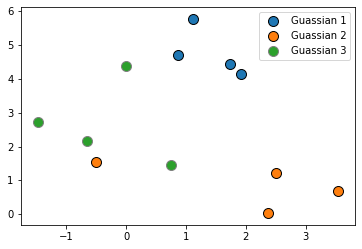

In [37]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y, markers='o')
plt.legend(["Guassian 1", "Guassian 2", "Guassian 3"], loc='best')
plt.show()

### DBSCAN with default parameters

We use DBSCAN with default parameters to cluster these samples:
* eps=0.5
* min_samples=5

In [39]:
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("Cluster memberships:\n{}".format(clusters))

Cluster memberships:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


A cluster membership of -1 means the corresponding data point is an outlier.

The DBSCAN algorithm with the default setting regards all data points as outliers!

The variable *dbscan.labels_* also contains the clustering result, i.e., the cluster label for each data point. Let's plot the clustering result.

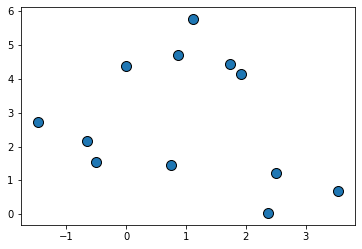

In [40]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], dbscan.labels_)

### Effect of changing parameters

Function **mglearn.plots.plot_dbscan()** encapsulates the plots of the DBSCAN results for the following parameters:
- min_samples: 2, 3, 5
- eps: 1.0, 1.5, 2.0, 3.0

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


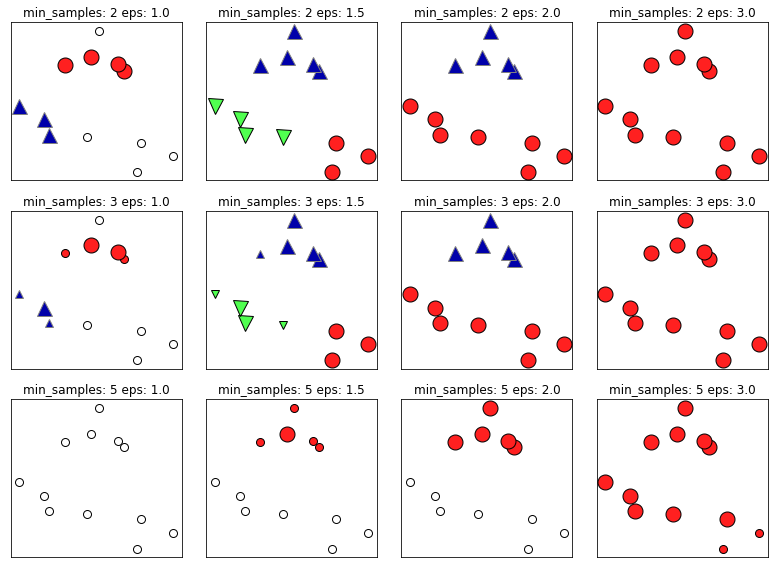

In [41]:
mglearn.plots.plot_dbscan()

Above, see the difference between **core points** (enlarged), **non-core points** (small), and **outliers** (no color).

### Observations:
* **From top to bottom**: When eps is fixed, a larger min_samples results in fewer core points, more non-core points and more outliers.
* **From left to right**: When min_samples is fixed, a larger eps results in more core points, fewer non-core and outliers, and fewer clusters.
* Two extreme and opposite cases: All points are outliers (**bottom-left**) vs. all points are core points in one cluster (**top-right**). They result from 'opposite' settings of eps and min_samples.

## 2. An example with make_moons()

This example shows that DBSCAN can handle the non-convex case where k-means fails.

We also increase the percentage of noises and see the effect on SBSCAN.

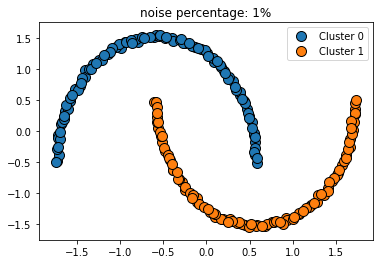

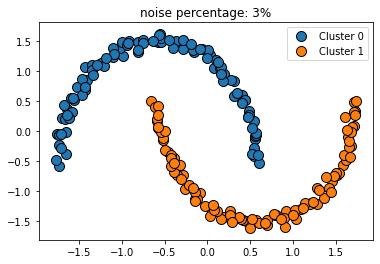

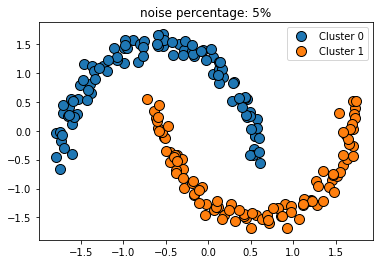

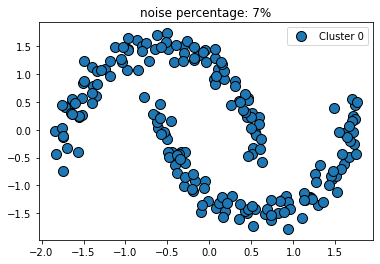

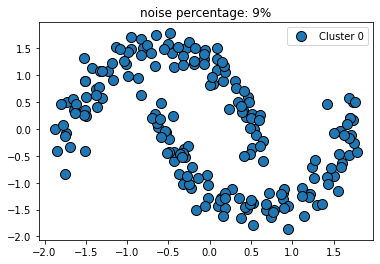

In [54]:
for multiple in range(1, 11, 2):
    # ns is the percentage of noise in the generated data.
    # ns is changed from 0.01, 0.03, 0.05, 0.07, 0.09
    ns = 0.01*multiple
    X, y = make_moons(n_samples=200, noise=ns, random_state=0)

    # The original data generated is not normalized. We apply the Standard Data Scaling (Gaussian distribution)
    scaler = StandardScaler()
    scaler.fit(X)
    X = scaler.transform(X)

    # We apply DBSCAN on the scaled data X
    dbscan = DBSCAN()
    clusters = dbscan.fit_predict(X)
    
    # We plot the clustering result
    mglearn.discrete_scatter(X[:, 0], X[:, 1], clusters, markers='o')
    plt.legend(["Cluster 0", "Cluster 1"], loc='best')
    plt.title('noise percentage: {0}%'.format(round(ns*100)))
    plt.show()

Above, as sufficiently more noises (7%) are introduced, the two clusters are merged! Core points from one cluster can influence points from the originally other cluster.

Let's focus on the dataset with 9% noises, i.e., 18 outliers. By decreasing the eps, we may be able to detect some of them.

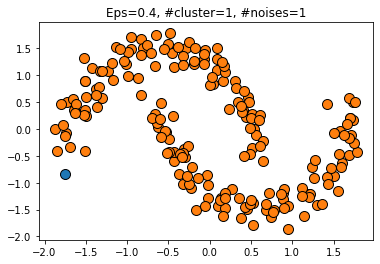

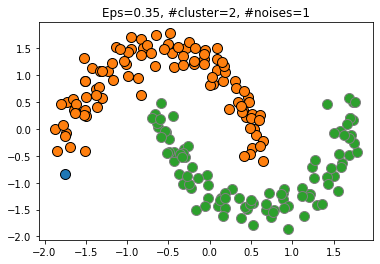

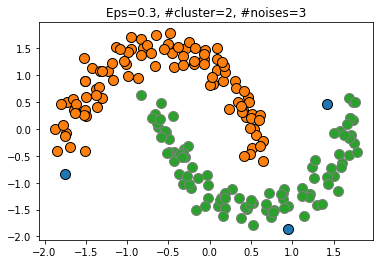

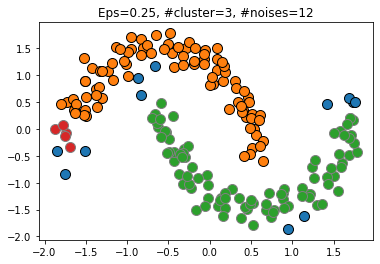

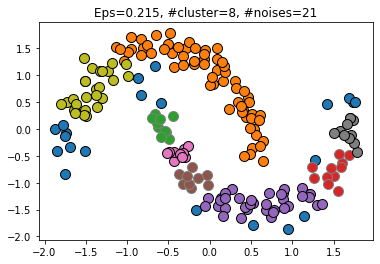

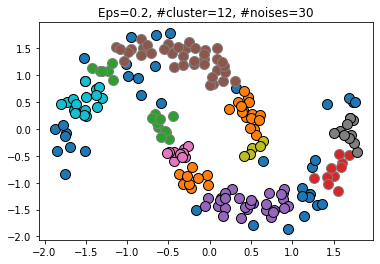

In [55]:
ns = 0.09
X, y = make_moons(n_samples=200, noise=ns, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

for e in [0.4, 0.35, 0.3, 0.25, 0.215, 0.2]:
    dbscan = DBSCAN(eps=e)
    clusters = dbscan.fit_predict(X)
    
    mglearn.discrete_scatter(X[:, 0], X[:, 1], clusters, markers='o')
    
    # We get the number of clusters from the clustering result. We create a set from the varialbe clusters. 
    # The set will only contain distinct values, each for a cluster, or '-1' if a noise is found.
    n_cluster = len(set(clusters)) - (1 if -1 in clusters else 0)
    
    # The number of noises is the number of '-1' in the variable of clusters.
    n_noise = list(clusters).count(-1)
    plt.title('Eps={0}, #cluster={1}, #noises={2}'.format(e, n_cluster, n_noise))

    plt.show()

## References

* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
* https://machinelearningknowledge.ai/tutorial-for-dbscan-clustering-in-python-sklearn/